In [1]:
# =============================
# 1. Importar librerías
# =============================
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
# =============================
# 2. Cargar dataset (CIFAR-10)
# =============================
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

#Normalizar
x_train, x_test = x_train / 255.0, x_test / 255.0

print("Shape: ", x_train.shape, y_train.shape)

Shape:  (50000, 32, 32, 3) (50000, 1)


In [3]:
# =============================
# 3. Definir modelo con Transfer Learning
# =============================

base_model = MobileNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=(128,128,3)
)
base_model.trainable = False

model = models.Sequential([
    tf.keras.layers.Resizing(128,128),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [4]:
# =============================
# 4. Entrenamiento
# =============================
history = model.fit(
    x_train, y_train,
    validation_data = (x_test, y_test),
    epochs = 5,
    batch_size = 64
)

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 372s 468ms/step - accuracy: 0.7333 - loss: 0.7626 - val_accuracy: 0.7707 - val_loss: 0.6523
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 403s 516ms/step - accuracy: 0.7871 - loss: 0.6037 - val_accuracy: 0.7689 - val_loss: 0.6422
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 370s 473ms/step - accuracy: 0.8067 - loss: 0.5479 - val_accuracy: 0.7865 - val_loss: 0.6083
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 365s 467ms/step - accuracy: 0.8216 - loss: 0.5109 - val_accuracy: 0.7909 - val_loss: 0.5962
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 353s 451ms/step - accuracy: 0.8307 - loss: 0.4814 - val_accuracy: 0.7885 - val_loss: 0.6054


In [5]:
# =============================
# 5. Evaluación
# =============================
loss, acc = model.evaluate(x_test, y_test)
print(f"Acurracy en test: {acc:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 69s 219ms/step - accuracy: 0.7885 - loss: 0.6054
Acurracy en test: 0.79


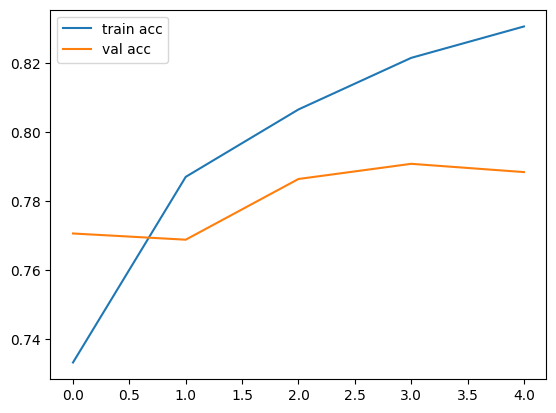

In [6]:
# =============================
# 6. Visualizar curvas
# =============================
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [7]:
# =============================
# 7. Guardar Modelo
# =============================
model.save("image_classifier.h5")